# Pandas: exploratory data analysis

### Plan:
* Table Joins
* Variable Types
* Working with Categorical Variables
* Working with Dates and Times
* Missing Values
* Anomaly Detection

Additionally, we will touch on visualization, but explore it in detail on the next seminar.

In [1]:
import numpy as np         # library for matrix and math
import pandas as pd        # library for work with tables
from scipy import stats    # module for work with statistics

# library for visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')    # graph's style
%matplotlib inline 

## Table Joins

Often, storing all information in a single table is inconvenient. For large IT companies, the amount of data is so massive that working with a single table becomes inefficient in terms of time and memory. Therefore, information is spread across multiple tables with specific relationships (columns used for joining tables).

Example of such a data storage structure:

### 1. Join

In [2]:
df1 = pd.DataFrame({'Student': ['Tom', 'Ujin', 'Ann', 'Polina','Sam'],
                    'group': ['01', '02', '02', '01','02']})
df2 = pd.DataFrame({'Name': ['Tom', 'Ujin', 'Ann', 'Polina', 'Kit'],
                    'GPA': ['7.8', '6.4', '8.3', '9', '10']})
display(df1, df2)

Student group
0     Tom    01
1    Ujin    02
2     Ann    02
3  Polina    01
4     Sam    02

Name  GPA
0     Tom  7.8
1    Ujin  6.4
2     Ann  8.3
3  Polina    9
4     Kit   10

In [3]:
# inner join by default
pd.merge(df1, df2, left_on='Student', right_on='Name')

Student group    Name  GPA
0     Tom    01     Tom  7.8
1    Ujin    02    Ujin  6.4
2     Ann    02     Ann  8.3
3  Polina    01  Polina    9

In [4]:
# left join - we leave everything in the left table
pd.merge(df1, df2, left_on='Student', right_on='Name', how='left')

Student group    Name  GPA
0     Tom    01     Tom  7.8
1    Ujin    02    Ujin  6.4
2     Ann    02     Ann  8.3
3  Polina    01  Polina    9
4     Sam    02     NaN  NaN

In [5]:
# outer join
pd.merge(df1, df2, left_on='Student', right_on='Name', how='outer')

Student group    Name  GPA
0     Tom    01     Tom  7.8
1    Ujin    02    Ujin  6.4
2     Ann    02     Ann  8.3
3  Polina    01  Polina    9
4     Sam    02     NaN  NaN
5     NaN   NaN     Kit   10

### 2. Row Concatenation

In [6]:
df1 = pd.DataFrame({'name': ['Max', 'Phil', 'Vlad', 'Nastya'], 'students': [20, 21, 30, 42]})
df2 = pd.DataFrame({'name': ['Ahmed', 'Andrey'], 'students': [50, 40]})

display(df1, df2)

name  students
0     Max        20
1    Phil        21
2    Vlad        30
3  Nastya        42

name  students
0   Ahmed        50
1  Andrey        40

In [7]:
pd.concat([df1, df2]).reset_index(drop=True)

name  students
0     Max        20
1    Phil        21
2    Vlad        30
3  Nastya        42
4   Ahmed        50
5  Andrey        40

### Example with YouTube Clips

We will work with a database containing information about YouTube clips. The database consists of several tables with relationships. The structure looks like this: 



<center>
<img src="https://github.com/hse-econ-data-science/dap_2021_spring/blob/main/sem09_pandas/images/struct.png?raw=true" height="500" width="500">
</center>

__Column Descriptions::__

* `id_title` $-$ unique video ID
* `id_music_style` $-$ unique genre ID
* `id_performer` $-$ unique performer ID
* `title` $-$ video title
* `commentCount` $-$ number of comments
* `dislikeCount` $-$ number of dislikes
* `likeCount` $-$ number of likes
* `music_style` $-$ music genre
* `performer` $-$ performer
* `viewCount` $-$ number of views
* `commentators_uniq` $-$ number of unique commenters
* `comments_obscene_cnt` $-$ number of negative comments
* `video_age` $-$ video age in days (as of '2019-03-15')

In [8]:
# let's upload all the tables
df_perf = pd.read_csv('data/performer_table.csv', sep=';')
df_title = pd.read_csv('data/title_table.csv', sep=';')
df_genre = pd.read_csv('data/music_style_table.csv', sep=';')

df_stat = pd.read_csv('data/title_stat_table.csv', sep=';')

### Task №1:

Which performer receives the most hate? (Hate is determined by the number of negative comments)

In [46]:
## Your code here

### Task №2:

For each genre, determine the most viewed clip. Who is the performer? What is the clip's name?

In [47]:
## Your code here

## Variable Types

__Classification by data type:__  

* `int` $-$ numeric, integers (1000, 0, -1)
* `float` $-$ numeric, floating point numbers (1.0, 2.564523)
* `object` $-$ string (e.g., JPMorgan, f12aaz//)
* `bool` $-$ boolean (True, False)
* `datetime` $-$ date (2020-01-12, 23.Jan.20)


__Classification by semantics:__  

* `Continuous` $-$ Continuous: variables that can take any value in a range (e.g., salary, height, weight of loaf of bread)
* `Categorical` $-$ variables with a finite set of values (e.g., age group, store type)
* `Binary` $-$ a subtype of categorical variables with only two categories (e.g., gender, capitals of 2 countries)

In [9]:
df = pd.read_csv('data/youtube_data_short.csv', sep='\t')

In [10]:
# let's take a look on variable types 
df.dtypes

title                    object
commentCount            float64
dislikeCount            float64
likeCount               float64
music_style              object
performer                object
viewCount               float64
commentators_uniq       float64
comments_obscene_cnt    float64
video_age                 int64
dtype: object

## Working with Categorical Variables

### When there are two categories:

Filter clips of 'rock' and 'rap' genres. Let's imagine that they are the only ones we are interested in.

In [14]:
genres_to_keep = ['rock', 'rap']

df_small = df[df.music_style.isin(genres_to_keep)]
df_small.head()

title  commentCount  \
8                       "Hey Tovarish" Video Shooting          10.0   
15                      "SOS Матросу!" - тизер фильма          10.0   
36                                        "ВОИН ДУМА"           4.0   
38  "Виктор Цой. 50 лет" Кукрыниксы - Печаль, Конч...           2.0   
40                           "Всё, что было". Начало.          23.0   

    dislikeCount  likeCount music_style     performer  viewCount  \
8            1.0       34.0        rock  мумий_тролль     3815.0   
15           4.0       68.0        rock  мумий_тролль     7632.0   
36           0.0       49.0        rock  король_и_шут     1950.0   
38           4.0       65.0        rock    кукрыниксы     9986.0   
40           5.0      171.0        rock          ария    11168.0   

    commentators_uniq  comments_obscene_cnt  video_age  
8                 9.0                   0.0       2539  
15                5.0                   0.0       1739  
36                NaN                   NaN       3819  
38                2.0                   0.0       2351  
40               21.0                   1.0       2351

In such a "sub-dataframe," our column `music_style` **is of type object** (since it contains strings), and **is binary**, because it only has two values (`rock` and `rap`)

owever, the problem with string variables is that many models cannot work with them. Computers are more accustomed to working with numbers.

That's why simple manipulations are performed on binary string variables. They are either encoded as numbers 1 / 0 or converted to a boolean type True / False, which is essentially the same thing.

Let’s try transforming our binary string variable music_style:

In [15]:
d = {'rock': 1, 'rap': 0}

df_small['is_rock'] = df_small['music_style'].map(d)

<ipython-input-15-21b19c4d8243>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['is_rock'] = df_small['music_style'].map(d)


In [16]:
df_small.head(2)

title  commentCount  dislikeCount  likeCount  \
8   "Hey Tovarish" Video Shooting          10.0           1.0       34.0   
15  "SOS Матросу!" - тизер фильма          10.0           4.0       68.0   

   music_style     performer  viewCount  commentators_uniq  \
8         rock  мумий_тролль     3815.0                9.0   
15        rock  мумий_тролль     7632.0                5.0   

    comments_obscene_cnt  video_age  is_rock  
8                    0.0       2539        1  
15                   0.0       1739        1

### Task №3: 
What is the share of observations for both genres?

In [48]:
## Your code here

### When there are more than two categories:

Let's return to our full dataframe. In it, the music_style column takes not 2 values but 7. What should we do in this case?

**Naive method:** Assign a unique number to each value in music_style. This method is called Label Encoding. Think in advance about the potential issues this approach might create.

In [272]:
df.music_style.unique()

array(['popsa', 'rock', 'classic', 'indi', 'estrada', 'shanson', 'rap'],
      dtype=object)

In [273]:
# Let's create a dictionary
d = dict(zip(df.music_style.unique(), np.arange(7)))
print(d)

# Let's perform the transformation
df['music_style_int'] = df['music_style'].map(d)

{'popsa': 0, 'rock': 1, 'classic': 2, 'indi': 3, 'estrada': 4, 'shanson': 5, 'rap': 6}


However, the problem with this method is that we unintentionally impose a **hierarchy** on our categories:
$6 > 5 > 4 > 3 > 2 > 1 > 0 \Rightarrow rap > shanson > estrada > indi > classic > rock > popsa$ 


To avoid this, a more common approach is used: **One Hot Encoding**

<center>
<img src="https://4.bp.blogspot.com/-iC7OQxsaPY0/XMdB9Q9QahI/AAAAAAAAGoY/qEStugMphDIbUIabd_taWCzTyscXzxOPgCLcBGAs/s1600/human_transpose.JPG" height="200" width="600">
</center>   


In pandas, this transformation can be done using the `get_dummies()` function

In [274]:
pd.get_dummies(df['music_style']).head()

classic  estrada  indi  popsa  rap  rock  shanson
0        0        0     0      1    0     0        0
1        0        0     0      1    0     0        0
2        0        0     0      1    0     0        0
3        0        0     0      1    0     0        0
4        0        0     0      1    0     0        0


This method also has its own issues, which are beyond the scope of our course. For example, it leads to complete multicollinearity (or linear dependence) between columns. You can learn more about this here: https://www.youtube.com/watch?v=k9PPuTmTLMk

## Working with Dates and Times

In Python, there is a specific variable type for dates and times: datetime/timestamp. All useful methods for working with dates can be found either in the pandas library or in the additional `datetime` package

In [275]:
# Let's get the date from the string
pd.to_datetime('01/01/20')

Timestamp('2020-01-01 00:00:00')

In [276]:
# We can get today's date
from datetime import datetime

datetime.today()

datetime.datetime(2021, 4, 4, 0, 37, 6, 196691)

In [277]:
# What year is it today?
datetime.today().year

2021

In [278]:
# Convert it to a string in a format that is convenient for us
datetime.today().strftime('%d/%m/%Y')

'04/04/2021'

In [279]:
from datetime import timedelta

# What month was 50 days ago?
(datetime.today() - timedelta(days=50)).month

2

### Task №4: 

Our dataset contains a column `video_age`, which indicates the age of each video in days since March 15, 2019. Based on this column, calculate the publication date for each video and save it in a new column.

In [49]:
## Your code here

### Task №5:

What is the distribution of the number of released clips by year?

In [50]:
## Your code here

### Task №6:

Output the month during which the most clips were posted on YouTube

In [90]:
## Your code here

## Missing values

Missing data $-$ a troublesome issue that you might encounter while working with datasets. Missing values occur almost inevitably. The reasons for missing data can vary; for instance, technical limitations of your parser that failed to extract some information from a website, or, for example, if you are Yuri Dud interviewing people about their salaries for a statistical study, not everyone would be willing to share such information with you.

### Identification of missing values

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19124 entries, 0 to 19123
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 19124 non-null  object 
 1   commentCount          18914 non-null  float64
 2   dislikeCount          18850 non-null  float64
 3   likeCount             18850 non-null  float64
 4   music_style           19124 non-null  object 
 5   performer             19124 non-null  object 
 6   viewCount             19123 non-null  float64
 7   commentators_uniq     12314 non-null  float64
 8   comments_obscene_cnt  12314 non-null  float64
 9   video_age             19124 non-null  int64  
 10  music_style_int       19124 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.6+ MB


In [284]:
df.isnull().sum()

title                      0
commentCount             210
dislikeCount             274
likeCount                274
music_style                0
performer                  0
viewCount                  1
commentators_uniq       6810
comments_obscene_cnt    6810
video_age                  0
music_style_int            0
dtype: int64

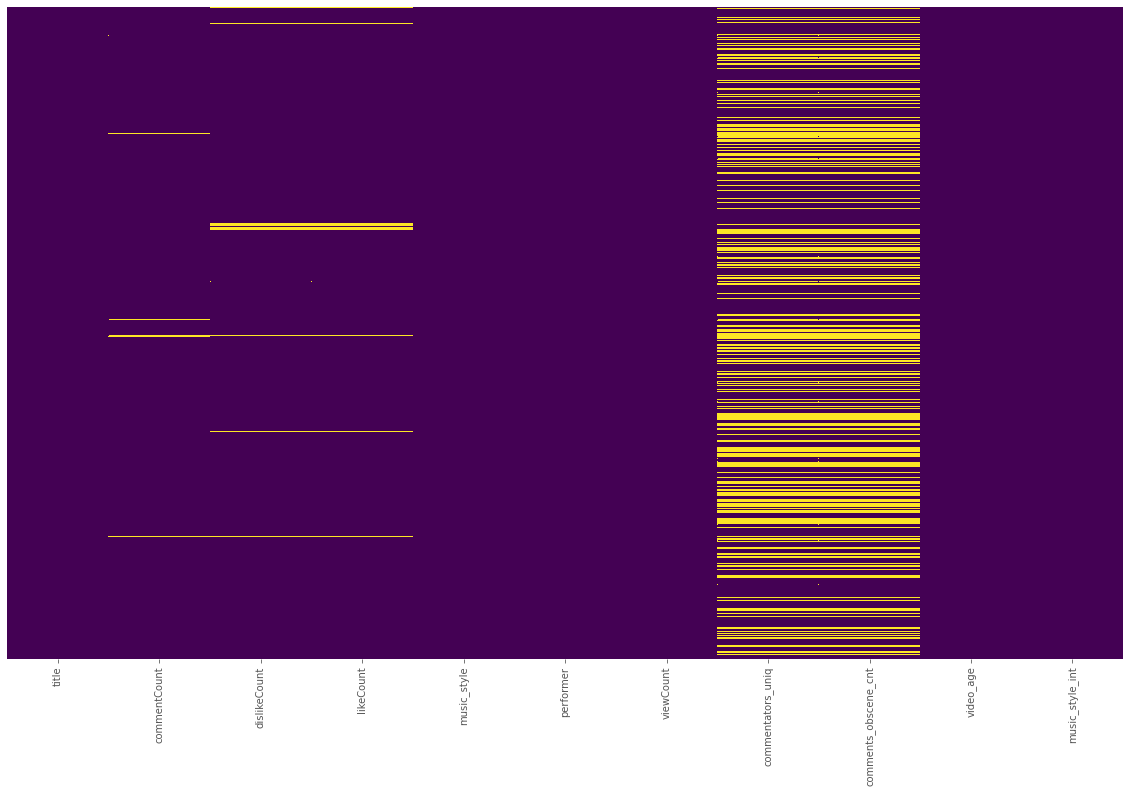

In [285]:
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Removal of missing values

In [286]:
print(df.shape)

# by default, deletes the lines where there is na
print(df.dropna().shape)

# We can delete columns that contain at least one missing value
print(df.dropna(axis=1).shape)

(19124, 11)
(12116, 11)
(19124, 5)


Deletion is often too costly operation, because it removes a significant amount of data, which is often already scarce

### Filling

In [287]:
# before
ser = pd.Series([24, np.nan, 27, 2])
ser

0    24.0
1     NaN
2    27.0
3     2.0
dtype: float64

In [288]:
# Filling with zero
ser.fillna(0).head()

0    24.0
1     0.0
2    27.0
3     2.0
dtype: float64

In [289]:
# Filling with previous value 
ser.fillna(method='ffill').head()

0    24.0
1    24.0
2    27.0
3     2.0
dtype: float64

In [290]:
# Filling with the following value
ser.fillna(method='bfill').head()

0    24.0
1    27.0
2    27.0
3     2.0
dtype: float64

### Task №7:

Fill in the missing values in the columns of the clip table using the column average value

In [93]:
## Your code here

## Anomalies detection

Anomalies in data $-$ as common as missing values but are often more serious. Let’s look at an example of how anomalies can disrupt results:

### Evaluating the average height of students in a school class:

Imagine we want to estimate the average height of students in a school class. We have the following table:

In [292]:
students = pd.DataFrame({'student': ['Max', 'Ahmed', 'Nastya', 'Vlad'],
                        'height_cm': [170, 165, 171, 168]})

students

student  height_cm
0     Max        170
1   Ahmed        165
2  Nastya        171
3    Vlad        168

Let's find the average:

In [293]:
students.height_cm.mean()

168.5

Now imagine a new student, Philipp, joins our class. He stayed behind for an extra year because he played basketball instead of studying. A new observation is added to our table, and we try to estimate the height again.

In [294]:
students.loc[4] = ['Phil', 210]
students

student  height_cm
0     Max        170
1   Ahmed        165
2  Nastya        171
3    Vlad        168
4    Phil        210

In [295]:
students.height_cm.mean()

176.8

We notice that the average height *has changed significantly* due to a single individual with an atypical (*anomalous*) height for our sample. This happens because Philipp comes *from a different distribution* $-$ the distribution of basketball players. As a result, our average height is now *heavily inflated*, leading to *misleading statistics*.

A possible solution: Use quantiles (e.g., the median) for aggregated statistics.

In [296]:
students.height_cm.median()

170.0

**REMEMBER: The median is robust to outliers, unlike the mean!**

### Detecting and removing outliers using YouTube clips as an example:

In [297]:
df.likeCount.mean()

5735.014482758621

In [298]:
df.likeCount.median()

100.0

We observe that the mean number of likes is significantly higher compared to the median. The reason—outliers.

The distribution shows a long tail:

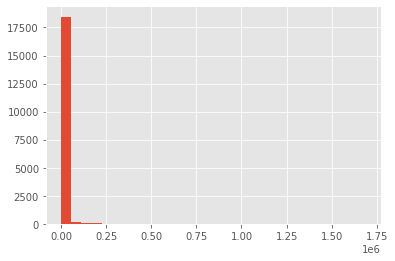

In [299]:
df.likeCount.hist(bins=30);

If it's not very visible, you can use a logarithmic scale.

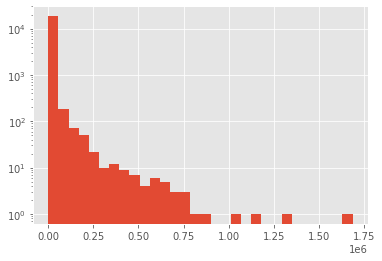

In [300]:
df.likeCount.hist(bins=30, log=True);

This indicates that our dataset includes clips with an anomalously high number of likes—so-called "hits." These outliers distort our statistics.

Let’s try to remove them:

**Method №1:** Exclude the top $1\%$ of clips with the highest number of likes by using the $99\%$ percentile.

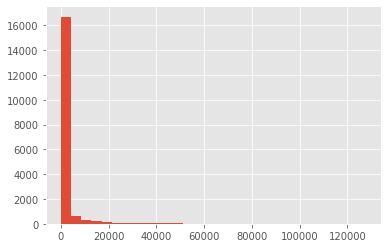

In [301]:
threshold = df.likeCount.quantile(0.99)
df_clear = df[df.likeCount <= threshold]

# Visualize
df_clear.likeCount.hist(bins=30);

**Method №2:** Define anomalies as all observations beyond three interquartile ranges.

### Task №8:

Implement this method. The interquartile range (IQR) is the difference between the 25th and 75th percentiles.

In [52]:
## Your code here

It’s worth noting that sometimes detecting anomalies is not just a preprocessing task. In some cases, anomaly detection is the goal. For example, anomalies could be bank fraudsters whose behavior differs from regular users, and finding such individuals becomes the primary objective.